========================================================================

# INSURANCE COST PREDICTION, Sample Questions in the real project, EDA & GUI

========================================================================

# Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

import joblib
from tkinter import *
import joblib

# Upload Dataset

In [2]:
df_ori = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df_ori

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Copy Dataset

In [3]:
df = df_ori.copy(deep=True)

### Data Labelling 

In [4]:
df['sex'] = df['sex'].replace({'male':0, 'female':1})
df['smoker'] = df['smoker'].replace({'yes':0, 'no':1})
df['region'] = df['region'].replace({'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3})

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


# Exploratory Data Analysis

There are several important questions that need to be answered in this dataset:

1. What are the variables that significantly affect the insurance cost?
2. Do insurance participants tend to be young or old (<= 40 years old or > 40 years old)?
3. What is the gender composition in this dataset? Is it balanced?
4. Is the insurance cost the same for participants with the same variables but different genders?
5. Describe the overall distribution and percentage of smokers.
6. Describe the distribution of the number of smokers by age.
7. Describe the distribution of the number of smokers by gender.
8. Visually depict the effect of age, gender, and smoking status of participants on the insurance cost.
9. What is the difference in average cost between smokers and non-smokers of the same age?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [6]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,1.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


### Q1. What are the variables that significantly affect the insurance cost?

In [7]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,0.006308,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.012816,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.262754,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,0.001205,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,0.038873,-0.787251
region,0.006308,0.012816,-0.262754,0.001205,0.038873,1.000000,-0.039473
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,-0.039473,1.000000


In [8]:
df_corr_to_charge = pd.DataFrame({
    'variables': ['age', 'sex', 'bmi', 'children', 'smoker', 'region'], 
    'corr_values': [0.299008, abs(-0.057292), 0.198341, 0.067998, abs(-0.787251), abs(-0.039473)]
})
df_corr_to_charge.sort_values(by=('corr_values'), ascending=False)

,variables,corr_values
4,smoker,0.787251
0,age,0.299008
2,bmi,0.198341
3,children,0.067998
1,sex,0.057292
5,region,0.039473


From the table above, it can be seen that the variables that significantly affect the insurance cost in order are: 'smoker', 'age', 'bmi, children', 'sex', 'region'.

### Q2. Do insurance participants tend to be young or old (<= 40 years old or > 40 years old)?

In [9]:
print('Number of insurance participants who are 40 years old or younger : ', df[df.age<=40]['age'].count())
print('Number of insurance participants who are over 40 years old       : ', df[df.age>40]['age'].count())

Number of insurance participants who are 40 years old or younger :  701
Number of insurance participants who are over 40 years old       :  637


Text(0, 0.5, 'Age')

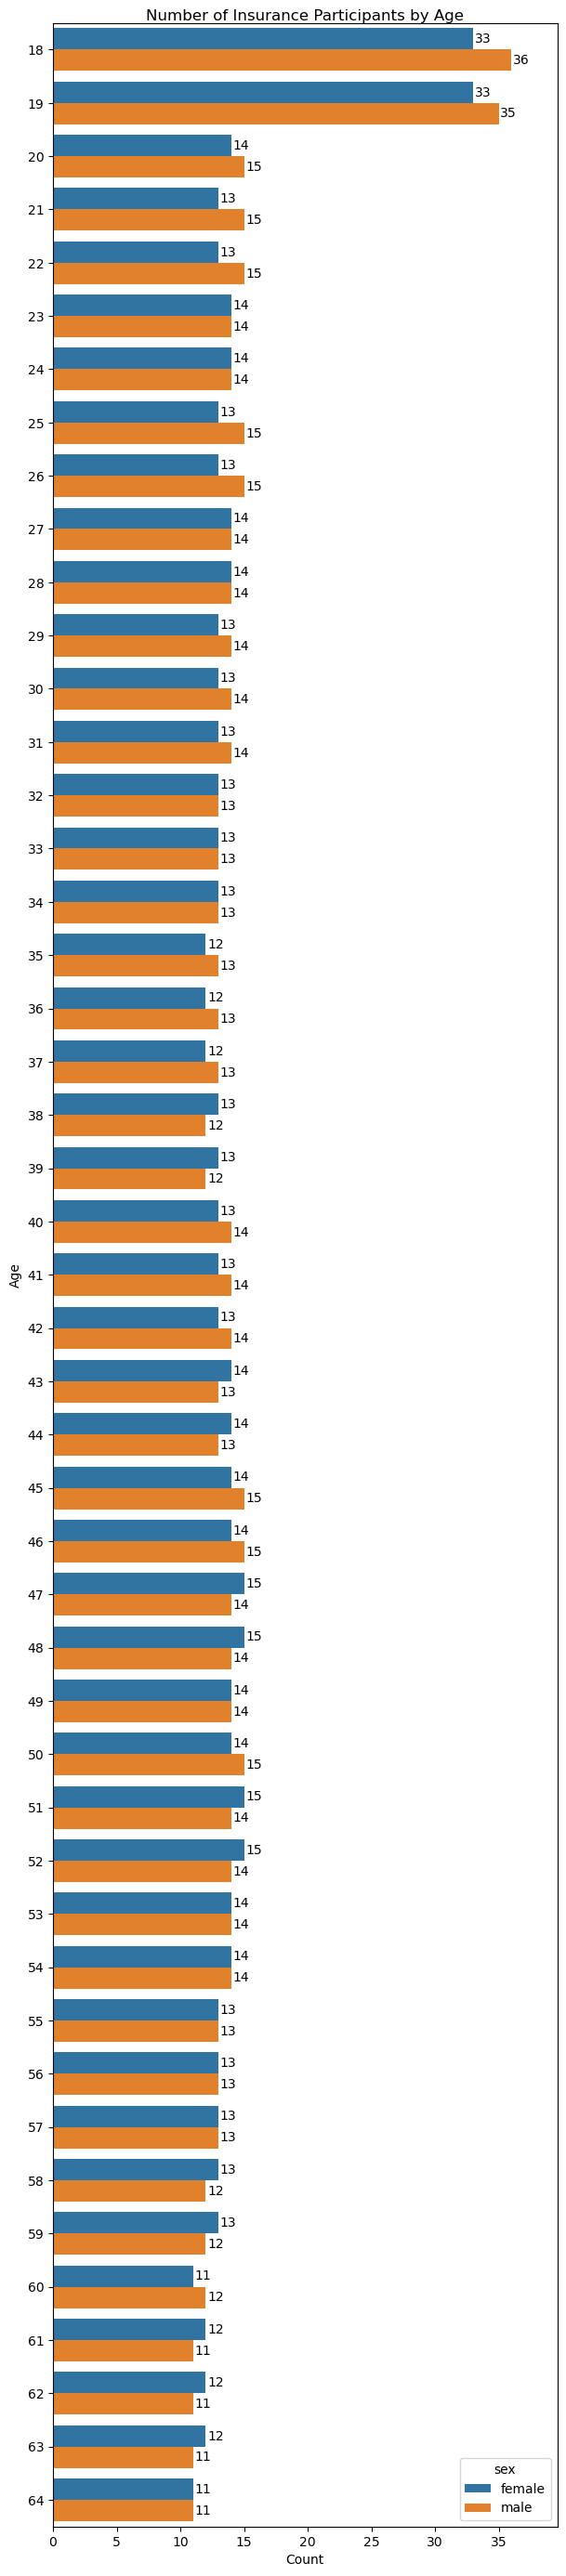

In [10]:
plt.figure(figsize=(7,35))
ax = sns.countplot(y=df_ori.age, hue=df_ori.sex, width=0.8, orient='v')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1.2, fontsize=10)
ax.margins(x=0.1)

plt.title('Number of Insurance Participants by Age', pad=2)
plt.xlabel('Count')
plt.ylabel('Age')

From the analysis above, it is known that the majority of insurance participants are aged 18 to 40 years, with the most participants aged 18 and 19 years.

### Q3. What is the gender composition in this dataset? Is it balanced?

,sex
male,676
female,662


Text(0.5, 0, 'Sex')

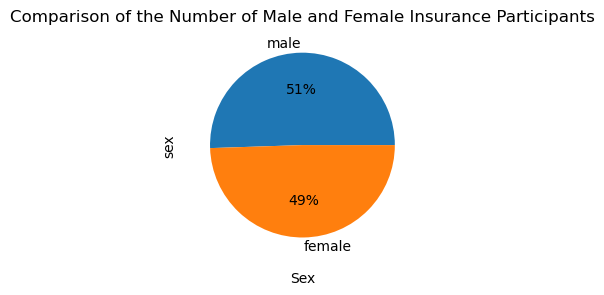

In [11]:
display(df_ori.sex.value_counts().to_frame())
ax = df_ori.sex.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(3,3))
plt.title('Comparison of the Number of Male and Female Insurance Participants')
plt.xlabel('Sex')

In [12]:
male_series = df[df_ori.sex=='male']['age'].groupby(df.age).size()
female_series = df[df_ori.sex=='female']['age'].groupby(df.age).size()

age_by_sex = pd.DataFrame({
    'male': male_series,
    'female': female_series,
})
print('Number of rows and columns: ', age_by_sex.shape)
print('\nLowest number :') 
display(age_by_sex.min())
print('\nHighest number :')
display(age_by_sex.max())
display(age_by_sex.head())

Number of rows and columns:  (47, 2)

Lowest number :


male      11
female    11
dtype: int64


Highest number :


male      36
female    33
dtype: int64

,male,female
age,,
18,36,33
19,35,33
20,15,14
21,15,13
22,15,13


Text(0, 0.5, 'Count')

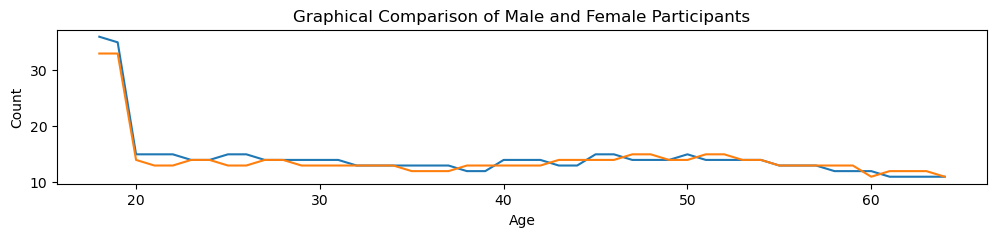

In [13]:
plt.figure(figsize=(12,2))
ax = male_series.plot(kind='line')
ax = female_series.plot(kind='line')

plt.title('Graphical Comparison of Male and Female Participants')
plt.xlabel('Age')
plt.ylabel('Count')

From the analysis above, it can be concluded that the composition of the number of males and females in this dataset is almost balanced.

### Q4. Is the insurance cost the same for participants with the same variables but different genders?

In [14]:
df_ori.charges.value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [15]:
df_ori[df_ori.charges==1639.56310]


,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


After analysis, it is found that all unique values in the 'charges' column, and none of the 1338 individuals have the same payment amount except for 2 rows that are the same. Further examination revealed that all variables in both data are exactly the same. The possible conclusions are:

1. The data is a duplicate due to data entry errors.
2. The data belongs to 2 different individuals, and coincidentally have the same variables.

To ensure whether the data is a duplicate or not, additional variables such as name, father's and mother's name, or phone number should be added for analysis, as it is highly unlikely for individuals to have the same parents or phone numbers. If they still match, it can be checked using an ID card or driver's license ID as it is highly unlikely for different individuals to have the same ID card number.

### Q5. Describe the overall distribution and percentage of smokers.

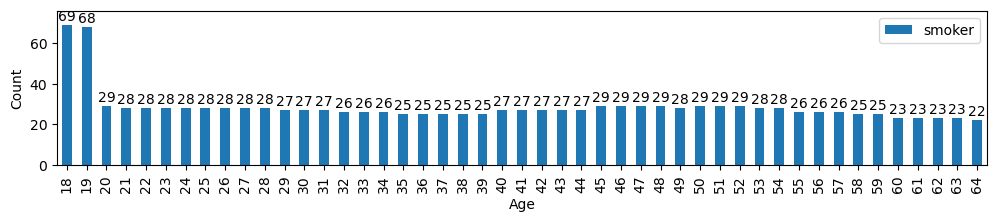

In [16]:
plt.figure(figsize=(12,2))
ax = df_ori.smoker.groupby(df.age).size().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1)
ax.margins(y=0.1)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

### Q6. Describe the distribution of the number of smokers by age.

The number of smoking and non-smoking participants is : 

Smoking : 274
Non Smoking : 1064


Text(0.5, 1.0, 'Comparison of smoking/non-smoking by age')

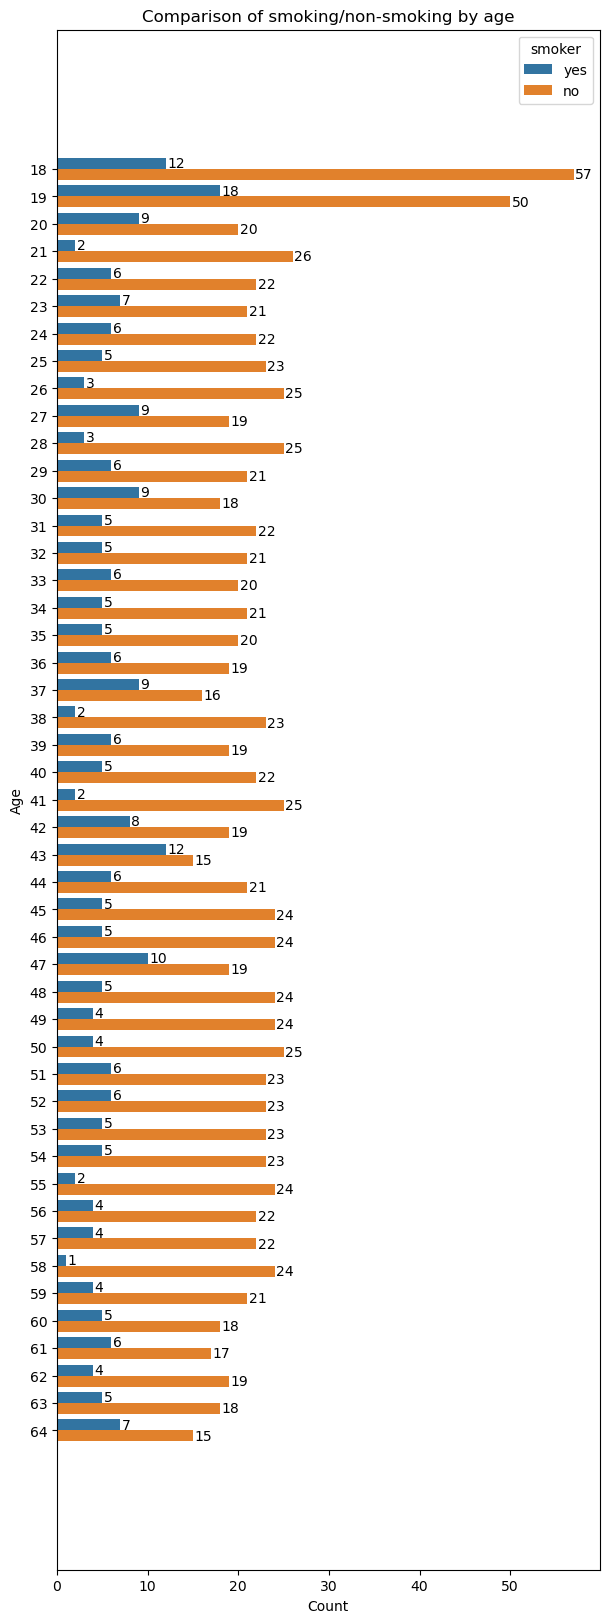

In [17]:
print('The number of smoking and non-smoking participants is : ')
print('\nSmoking :', df_ori[df_ori.smoker=='yes']['smoker'].count())
print('Non Smoking :', df_ori[df_ori.smoker=='no']['smoker'].count())

plt.figure(figsize=(7, 20))
ax = sns.countplot(y=df_ori.age, hue=df_ori.smoker, orient='v')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1)
ax.margins(y=0.1)

plt.xlabel('Count')
plt.ylabel('Age')
plt.title('Comparison of smoking/non-smoking by age')

### Q7. Describe the distribution of the number of smokers by gender.

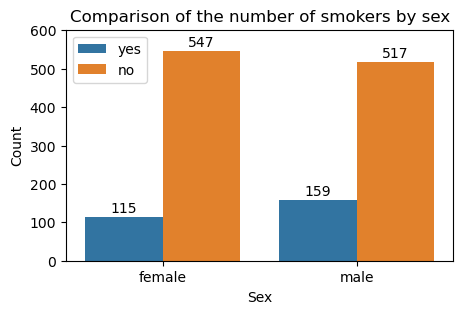

In [18]:
plt.figure(figsize=(5, 3))
ax = sns.countplot(x=df_ori.sex, hue=df_ori.smoker)

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1)
ax.margins(y=0.1)

plt.title('Comparison of the number of smokers by sex', )
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(loc='upper left')

From the above analysis it can be concluded that the majority of insurance participants did not smoke. It can be seen from the graph that shows the bar height is much different between smokers and non-smokers.

### Q8. Visually depict the effect of age, gender, and smoking status of participants on the insurance cost.

<Figure size 1200x500 with 0 Axes>

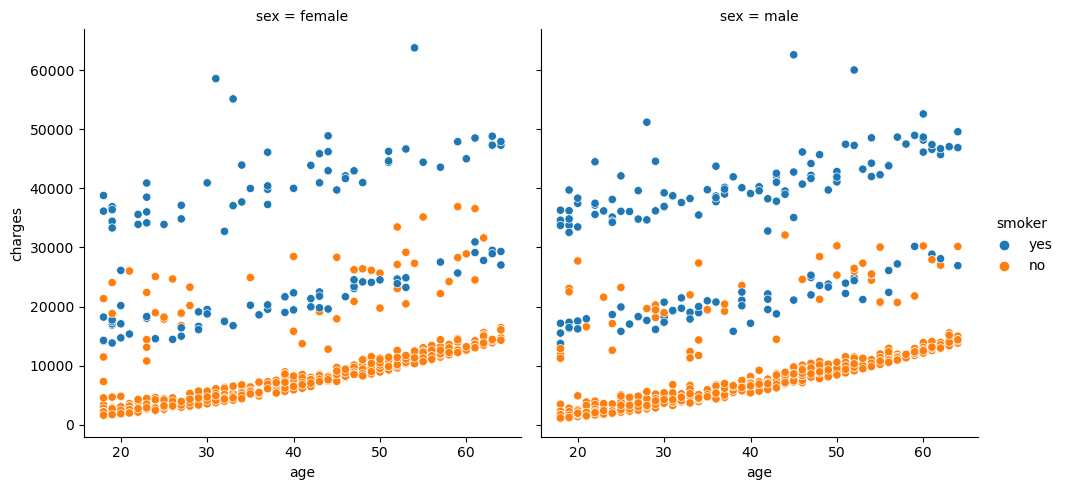

In [19]:
plt.figure(figsize=(12, 5))
sns.relplot(x='age', y='charges', col='sex', hue='smoker', data=df_ori)

From the graph it can be concluded that: 

1. For smokers and non-smokers, there is a very visible difference in the price of insurance charged. For example, insurance participants aged 18 to 30 years, who do not smoke, most of the insurance fees they pay are below 10,000, and smokers are all above 10,000. 

2. Age greatly affects the cost of insurance. It can be seen in the graph that the higher the age, even though they don't smoke, both men and women, the insurance costs increase. This initial hypothesis is the effect of BMI, because BMI previously had a strong correlation with 'charges'. So even if he doesn't smoke, if he has a high BMI, it is possible that he is at risk to take insurance so that the 'cost' becomes bigger.

### Q9. What is the difference in average cost between smokers and non-smokers of the same age?




In [20]:
smoker_charges = df_ori[df_ori.smoker=='yes'].groupby('age')['charges']
not_smoker_charges = df_ori[df_ori.smoker=='no'].groupby('age')['charges']

smoker_charges_mean = df_ori[df_ori.smoker=='yes'].groupby('age')['charges'].mean()
not_smoker_charges_mean = df_ori[df_ori.smoker=='no'].groupby('age')['charges'].mean()

smoker_yesno_charges = pd.DataFrame({
    'smoking': smoker_charges,
    'non_smoking': not_smoker_charges,
    'smoking_mean': smoker_charges_mean,
    'non_smoking_mean': not_smoker_charges_mean,
    'the_difference_of_the_means': abs(smoker_charges_mean) - abs(not_smoker_charges_mean)
})

smoker_yesno_charges

,smoking,non_smoking,smoking_mean,non_smoking_mean,the_difference_of_the_means
age,,,,,
18,"(18, [34303.1672, 15518.18025, 36149.4835, 128...","(18, [1725.5523, 1137.011, 2198.18985, 3393.35...",25473.730221,3215.162259,22258.567962
19,"(19, [16884.924, 17081.08, 34779.615, 17352.68...","(19, [1837.237, 4687.797, 1625.43375, 1743.214...",27001.232768,3536.712898,23464.519870
20,"(20, [14711.7438, 17560.37975, 17085.2676, 334...","(20, [2257.47525, 2457.21115, 4830.63, 1980.07...",24574.330650,3673.112925,20901.217725
21,"(21, [17942.106, 15359.1045])","(21, [3579.8287, 1532.4697, 2026.9741, 2404.73...",16650.605250,3813.530413,12837.074837
22,"(22, [35585.576, 37165.1638, 35595.5898, 37484...","(22, [2755.02095, 2155.6815, 2045.68525, 2166....",37373.287517,2551.017880,34822.269637
23,"(23, [38511.6283, 18033.9679, 36189.1017, 3602...","(23, [1826.843, 2395.17155, 2775.19215, 1837.2...",31736.345671,5980.978162,25755.367509
24,"(24, [38126.2465, 35147.52848, 14571.8908, 344...","(24, [3046.062, 2855.43755, 3537.703, 25081.76...",29203.496972,5587.430232,23616.066739
25,"(25, [42112.2356, 15817.9857, 19933.458, 36124...","(25, [2721.3208, 4504.6624, 2137.6536, 2523.16...",29577.781200,5547.187943,24030.593257
26,"(26, [36085.219, 14455.64405, 17043.3414])","(26, [2302.3, 3877.30425, 3385.39915, 3490.549...",22528.068150,4166.516168,18361.551982


In [21]:
print('The difference of the lowest averages is : ', smoker_yesno_charges.the_difference_of_the_means.min())
print('The difference of the highest averages is : ', smoker_yesno_charges.the_difference_of_the_means.max())

The difference of the lowest averages is :  12837.074837307693
The difference of the highest averages is :  35018.29826916666


From the above dataset, we can see in detail the difference between the average insurance charges for smokers and non-smokers at the same age. It can be seen that the minimum difference is 12837.074837307693 and the maximum difference is 35018.29826916666.

This difference actually needs to be further investigated, as the study has not yet involved the BMI variable, which also has a significant impact on the difference in insurance charges even if the participant does not smoke. If a participant does not smoke but has a high BMI, it is very likely that their charges will be increased by the system considering the BMI risk. Moreover, if the participant is elderly (e.g. over 60 years old), smokes and has a high BMI, the system will further increase the insurance charges for that participant.

# Preprocessing

In [22]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Store Feature Matrix  X and y

In [23]:
X = df.drop(columns='charges')
y = df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Train/Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [25]:
display('The number of rows for X_train :', X_train.shape[0])
display('The number of rows for X_test :', X_test.shape[0])
display('The number of rows for y_train :', y_train.shape[0])
display('The number of rows for y_test :', y_test.shape[0])

'The number of rows for X_train :'

1070

'The number of rows for X_test :'

268

'The number of rows for y_train :'

1070

'The number of rows for y_test :'

268

### Training The Models

In [26]:
lr = LinearRegression()
lr.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gbr =  GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

### Prediction On Test Data

In [27]:
lr_predict = lr.predict(X_test)
svm_predict = svm.predict(X_test)
rf_predict = rf.predict(X_test)
gbr_predict = gbr.predict(X_test)

In [28]:
df_compare_models = pd.DataFrame({
    'Actual': y_test,
    'svm': svm_predict,
    'rf': rf_predict,
    'gbr': gbr_predict,
    
})

In [29]:
df_compare_models.head(10)

,Actual,svm,rf,gbr
910,2639.04290,9204.614246,2667.022675,4276.744943
823,8219.20390,9333.076341,10027.989603,9214.324260
677,46130.52650,9430.047451,47721.206982,45672.841124
559,1646.42970,9200.846937,1710.853831,3143.156728
1169,6112.35295,9287.138218,9328.507552,6184.358318
649,12430.95335,9421.586227,12522.610282,12822.355880
241,5354.07465,9256.377167,10164.682523,6765.766109
458,10601.41200,9411.816473,12715.397998,11658.274918
370,13415.03810,9423.385174,13518.819304,13037.218091
655,24667.41900,9383.234850,24138.069403,25011.901415


In [30]:
df_compare_models.shape

(268, 4)

### Compare Performance Visually

<AxesSubplot:ylabel='Density'>

<Figure size 400x400 with 0 Axes>

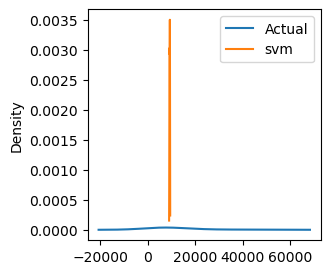

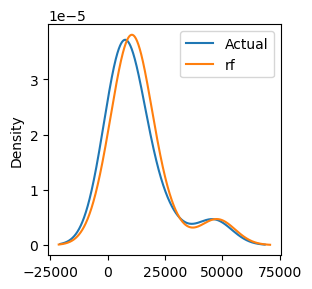

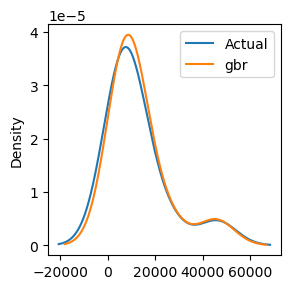

In [31]:
plt.figure(figsize=(4,4))
df_compare_models[['Actual', 'svm']].iloc[:11].plot.kde(figsize=(3,3))
df_compare_models[['Actual', 'rf']].iloc[:11].plot.kde(figsize=(3,3))
df_compare_models[['Actual', 'gbr']].iloc[:11].plot.kde(figsize=(3,3))

### Evaluating The Algorithm 

In [32]:
svm_r2_score = metrics.r2_score(y_test, svm_predict)
rf_r2_score = metrics.r2_score(y_test, rf_predict)
gbr_r2_score = metrics.r2_score(y_test, gbr_predict)

svm_mae_score = metrics.mean_absolute_error(y_test, svm_predict)
rf_mae_score = metrics.mean_absolute_error(y_test, rf_predict)
gbr_mae_score = metrics.mean_absolute_error(y_test, gbr_predict)


In [33]:
display(svm_r2_score)
display(svm_mae_score)

-0.10625951766376085

7717.871923385576

In [34]:
all_metrics = pd.DataFrame([[svm_r2_score, rf_r2_score, gbr_r2_score], [svm_mae_score, rf_mae_score, gbr_mae_score]], 
                           columns=['svm', 'rf', 'gbr'], index=['r2', 'mae'])
all_metrics

,svm,rf,gbr
r2,-0.106260,0.819533,0.835909
mae,7717.871923,2775.999545,2526.328186


### Predict Charges For New Customer

In [35]:
# make a new sample customer

customer_1 = pd.DataFrame({
    'age': 40,
    'sex': 1,
    'bmi': 65,
    'children': 3,
    'smoker': 1,
    'region': 2,
}, index=[0])

customer_1

,age,sex,bmi,children,smoker,region
0,40,1,65,3,1,2


### Predict Charges For A New Customer Using GBR Model Trained Using Train Dataset.

In [36]:
gbr.predict(customer_1)

array([7098.3424674])

### Predict Using Model Trained By Using Entire Dataset

In [37]:
gbr = GradientBoostingRegressor()
gbr.fit(X,y)
print('Charges customer_1 pay for insurance is {} US$ yearly'.format(gbr.predict(customer_1)))

Charges customer_1 pay for insurance is [8665.74683269] US$ yearly


# Save Model Using Joblib

In [38]:
joblib.dump(gbr, 'gbr_model')
model = joblib.load('gbr_model')
print('Charges customer_1 pay for insurance is {} US$ yearly'.format(model.predict(customer_1)))

Charges customer_1 pay for insurance is [8665.74683269] US$ yearly


# GUI 

In [39]:
def show_entry():
    
    p1 = float(e1.get() )
    p2 = float(e2.get() )
    p3 = float(e3.get() )
    p4 = float(e4.get() )
    p5 = float(e5.get() )
    p6 = float(e6.get() )
    
    model = joblib.load('gbr_model')
    result = model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master,text='Insurance Cost').grid(row=7)
    Label(master,text=result).grid(row=8)

master = Tk()

master.title('Insurance Cost Prediction')

Label(master,text = 'Insurance Cost Prediction', bg='black', fg='white').grid(row=0, columnspan=5)
Label(master,text = 'Enter Your Age').grid(row=1)
Label(master,text = 'Enter Your Sex Press 0 for Male, Press 1 for Female').grid(row=2)
Label(master,text = 'Enter Your BMI Number').grid(row=3)
Label(master,text = 'Enter Your Children Number').grid(row=4)
Label(master,text = 'Smoker Press 0 for Yes. Press 1 for No').grid(row=5)
Label(master,text = 'Enter Your Region southeast:0, southwest:1, northwest:2, northeast:3').grid(row=6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

Button(master,text='Predict',command=show_entry).grid()


master.mainloop()

TclError: no display name and no $DISPLAY environment variable